<a href="https://colab.research.google.com/github/parul2712/ML-LAB/blob/main/MLexp12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Iris (1).csv to Iris (1).csv


In [6]:
import pandas as pd

df = pd.read_csv("Iris (1).csv")
df = df.drop(["Id", "Species"], axis=1)  # Drop ID and species
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
import numpy as np

def kmeans_manual(X, k, max_iter=100):
    np.random.seed(0)
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iter):
        labels = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in X])
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    sse = sum(np.sum((X[labels == i] - centroids[i]) ** 2) for i in range(k))
    return sse

In [8]:
from sklearn.cluster import KMeans

In [9]:
manual_sse = []
lib_sse = []
X = df.values

for k in [2, 3, 4, 5]:
    sse_m = kmeans_manual(X, k)
    sse_l = KMeans(n_clusters=k, random_state=0).fit(X).inertia_

    manual_sse.append(sse_m)
    lib_sse.append(sse_l)

    print(f"k={k} | Manual SSE: {sse_m:.2f} | Library SSE: {sse_l:.2f}")

k=2 | Manual SSE: 152.37 | Library SSE: 152.37
k=3 | Manual SSE: 78.95 | Library SSE: 78.95
k=4 | Manual SSE: 57.47 | Library SSE: 57.32
k=5 | Manual SSE: 50.19 | Library SSE: 49.92


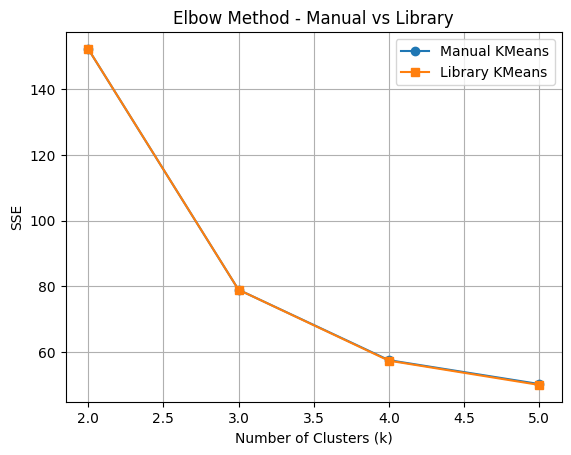

In [10]:
import matplotlib.pyplot as plt

k_vals = [2, 3, 4, 5]
plt.plot(k_vals, manual_sse, marker='o', label='Manual KMeans')
plt.plot(k_vals, lib_sse, marker='s', label='Library KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method - Manual vs Library')
plt.legend()
plt.grid(True)
plt.show()